In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

def draw_lines_from_csv(csv_files, x_axis, y_axes, labels=None, title=None, xlabel=None, ylabel=None, save_path=None, smooth=False, ylim=None):
    """
    Draw a line plot from one or more CSV files, supporting multiple y-axes and optional spline smoothing.

    Args:
        csv_files (list of str): List of paths to CSV files.
        x_axis (str): Column name to use for the x-axis.
        y_axes (list of str): List of column names to use for the y-axis.
        labels (list of str, optional): Labels for the lines corresponding to each CSV file and y-axis combination.
        title (str, optional): Title of the plot.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        save_path (str, optional): Path to save the plot as an image.
        smooth (int, float, or bool, optional): Controls line smoothing. If an integer/float, it specifies the number of points for smoothing.
            If False, no smoothing is applied. Default is False.

    Returns:
        None
    """
    plt.figure(figsize=(10, 10))

    for i, csv_file in enumerate(csv_files):
        # Load CSV data
        df = pd.read_csv(csv_file)

        # Check if x_axis and y_axes columns exist
        if x_axis not in df.columns or not all(y in df.columns for y in y_axes):
            raise ValueError(f"Columns '{x_axis}' and {y_axes} must be present in {csv_file}.")

        # Plot each y-axis column
        for y_axis in y_axes:
            label = f"{labels[i]} - {y_axis}" if labels else f"Line {i+1} - {y_axis}"

            # Smooth the line if smooth is specified
            if smooth and isinstance(smooth, (int, float)):
                # Sort the data by x-axis for proper interpolation
                df = df.sort_values(by=x_axis)
                
                # Generate spline interpolation
                x_values = df[x_axis].values
                y_values = df[y_axis].values
                spline = make_interp_spline(x_values, y_values, k=3)  # k=3 for cubic splines
                
                # Generate smoothed x and y values
                x_smooth = np.linspace(x_values.min(), x_values.max(), int(smooth))
                y_smooth = spline(x_smooth)

                # Plot the smoothed line
                sns.lineplot(x=x_smooth, y=y_smooth, label=label)
            else:
                # Plot the raw line without smoothing
                sns.lineplot(data=df, x=x_axis, y=y_axis, label=label, marker='o')

    # Add title and labels
    if title:
        plt.title(title)
    plt.xlabel(xlabel or x_axis)
    plt.ylabel(ylabel or " / ".join(y_axes))
    plt.ylim(ylim)

    # Add legend
    plt.legend(title="Legend")

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    # Show the plot
    plt.show()

# Example usage
csv_files = [
    '/nas_mnt/carruthers/Einar/tsg101_screen/train_acc.csv']#,
    #'/nas_mnt/carruthers/Einar/tsg101_screen/valid_loss.csv'
#]

draw_lines_from_csv(
    csv_files,
    x_axis="epoch",
    y_axes=['plate1', 'plate2', 'plate3', 'plate4'],
    labels=['train', 'val'],
    title="Smoothed Accuracy Over Epochs",
    xlabel="Epoch",
    ylabel="Accuracy",
    save_path="/nas_mnt/carruthers/Einar/tsg101_screen/Train_acc.pdf",
    smooth=400,
    ylim=[0.94,1.01]
)


In [ ]:
# FIG2E
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

srcs_test = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/training/model/maxvit_t/rgb/epochs_100/train.csv']
settings = {'src':srcs_test,
            'graph_name':'acc',
            'data_column':['epoch','accuracy'],
            'grouping_column':'epoch',
            'graph_type':'line',
            'theme':'bright',
            'save':False,
            'y_lim':[None,None],
            'log_y':False,
            'log_x':False,
            'representation':'object',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

In [ ]:
import os

def count_files_in_subfolders(folder_path):
    """
    Walk through a folder and print the number of files in each subfolder.
    """
    for root, dirs, files in os.walk(folder_path):
        # Skip the root folder itself
        if root == folder_path:
            continue

        # Extract subfolder name from the path
        subfolder_name = os.path.basename(root)
        file_count = len(files)
        
        print(f'Subfolder: {subfolder_name}, Number of files: {file_count}')

# Example usage
count_files_in_subfolders('/path/to/your/folder')

In [ ]:
%matplotlib inline
from spacr.plot import plot_image_mask_overlay

#files = ['plate1_D01_1.npy', 'plate1_D01_2.npy', 'plate1_D01_3.npy', 'plate1_D01_4.npy', 'plate1_D01_5.npy', 'plate1_D01_6.npy', 'plate1_D01_7.npy', 'plate1_D01_8.npy']
files = ['plate1_D01_6.npy', 'plate1_D02_5.npy']
for file in files:
    path = '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/merged/'+file
    plot_image_mask_overlay(file=path,
                        channels=[0, 1, 2, 3],
                        cell_channel=3,
                        nucleus_channel=0,
                        pathogen_channel=2,
                        all_on_all=False,
                        all_outlines=False,
                        percentiles=(2, 99),
                        filter_dict=None)

pc = 'plate1_D02_5.npy'
nc = 'plate1_D01_6.npy'

In [ ]:
#Fig 2A,B
%matplotlib inline
from spacr.plot import plot_region
from spacr.utils import control_filelist
import os
folder = '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/merged'
files = control_filelist(folder, mode='column', values=['01', '02'])

for file in files:
    print(f"analyzing: {file}")
    settings = {'src':'/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1',
               'name':file,
               'activation_db':'241003_tsg101_screen_plate1.db',
               'activation_mode':'saliency_image',
               'percentiles':(2,98), 
               'channels':[0,1,2,3],
               'mode':'outlines',
               'cell_channel':3,
               'nucleus_channel':0,
               'pathogen_channel':2,
               'export_tiffs':True}
    
    plot_region(settings)

In [ ]:
'/media/olafsson/disc1/methods_paper/plate1/datasets/241003_tsg101_screen_plate1/saliency_image/class_1/plate1/'
'/media/olafsson/disc1/methods_paper/plate1/saliency_image/class_1/plate1/C02/plate1_C02_8_1.png'

In [ ]:
settings = {'src':'/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1',
           'name':'plate1_A02_2.npy',
           'activation_db':'241003_tsg101_screen_plate1.db',
           'activation_mode':'saliency_image',
           'percentiles':(2,98),
           'channels':[0,1,2,3],
           'mode':'outlines',
           'cell_channel':4,
           'nucleus_channel':5,
           'pathogen_channel':6,
           'export_tiffs':True}

field = 1
fields = [f'plate1_A01_{field}.npy',
          f'plate1_B01_{field}.npy',
          f'plate1_C01_{field}.npy',
          f'plate1_D01_{field}.npy',
          f'plate1_E01_{field}.npy',
          f'plate1_F01_{field}.npy',
          f'plate1_G01_{field}.npy',
          f'plate1_H01_{field}.npy',
          f'plate1_I01_{field}.npy',
          f'plate1_J01_{field}.npy',
          f'plate1_K02_{field}.npy',
          f'plate1_L02_{field}.npy',
          f'plate1_M02_{field}.npy',
          f'plate1_N02_{field}.npy',
          f'plate1_O02_{field}.npy',
          f'plate1_P02_{field}.npy']

for f in fields:
    settings['name'] = f
    plot_region(settings)

In [ ]:
# FIG2C
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_db
import os

srcs = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1',
        '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2',
        '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3',
        '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4']

settings = {'src':srcs,
            'database':'measurements.db',
            'graph_name':'fig_2c',
            'table_names':['cell, cytoplasm, nucleus, pathogen'],
            'data_column':'recruitment',
            'grouping_column':'condition',
            'cell_types':None,
            'cell_plate_metadata':None,
            'pathogen_types':['nc','pc'],
            'pathogen_plate_metadata':[['c1'],['c2']],
            'treatments':None,
            'treatment_plate_metadata':None,
            'graph_type':'jitter',
            'theme':'deep',
            'save':True,
            'y_lim':[1,1.5],
            'verbose':False,
            'nuclei_limit':2,
            'pathogen_limit':3,
            'representation':'well',
            'uninfected':False}

fig,df = plot_data_from_db(settings)
plt.show()
display(df)

In [ ]:
# FIG2E
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

srcs_train = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/training/model/maxvit_t/rgb/epochs_100/train.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/datasets/training/model/maxvit_t/rgb/epochs_100/train.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/datasets/training/model/maxvit_t/rgb/epochs_100/train.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/datasets/training/model/maxvit_t/rgb/epochs_100/train.csv']

srcs_valid = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/training/model/maxvit_t/rgb/epochs_100/validation.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/datasets/training/model/maxvit_t/rgb/epochs_100/validation.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/datasets/training/model/maxvit_t/rgb/epochs_100/validation.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/datasets/training/model/maxvit_t/rgb/epochs_100/validation.csv']

srcs_all = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/training/model/maxvit_t/rgb/epochs_100/train.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/datasets/training/model/maxvit_t/rgb/epochs_100/train.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/datasets/training/model/maxvit_t/rgb/epochs_100/train.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/datasets/training/model/maxvit_t/rgb/epochs_100/train.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/training/model/maxvit_t/rgb/epochs_100/validation.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/datasets/training/model/maxvit_t/rgb/epochs_100/validation.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/datasets/training/model/maxvit_t/rgb/epochs_100/validation.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/datasets/training/model/maxvit_t/rgb/epochs_100/validation.csv']

settings = {'src':srcs_valid,
            'graph_name':'fig2d_valid_acc',
            'data_column':['epoch','accuracy'],
            'grouping_column':'plate',
            'graph_type':'line_std',
            'theme':'bright',
            'save':True,
            'y_lim':[0.94, 1.001],
            'log_y':False,
            'log_x':False,
            'representation':'object',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

,Key,Value
0,src,[/nas_mnt/carruthers/Einar/tsg101_screen/TSG10...
1,database,"[241003_tsg101_screen_plate1.db, 241007_tsg101..."
2,save,True
3,graph_name,fig_2_2
4,table_names,saliency_image_correlations
5,data_column,"[channel_0_activation_0_pearsons, channel_1_ac..."
6,grouping_column,pathogen
7,cell_types,[Hela]
8,cell_plate_metadata,None
9,pathogen_types,"[nc, pc]"


Database: /nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/measurements/241003_tsg101_screen_plate1.db
Database table: saliency_image_correlations
Database: /nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/measurements/241007_tsg101_screen_plate2.db
Database table: saliency_image_correlations
Database: /nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/measurements/241008_tsg101_screen_plate3.db
Database table: saliency_image_correlations
Database: /nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/measurements/241008_tsg101_screen_plate4.db
Database table: saliency_image_correlations
Plot saved to /nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/fig_2_2/fig_2_2_channel_0_activation_0_pearsons_pathogen_violin.pdf
Test results saved to /nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/fig_2_2/fig_2_2_channel_0_activa

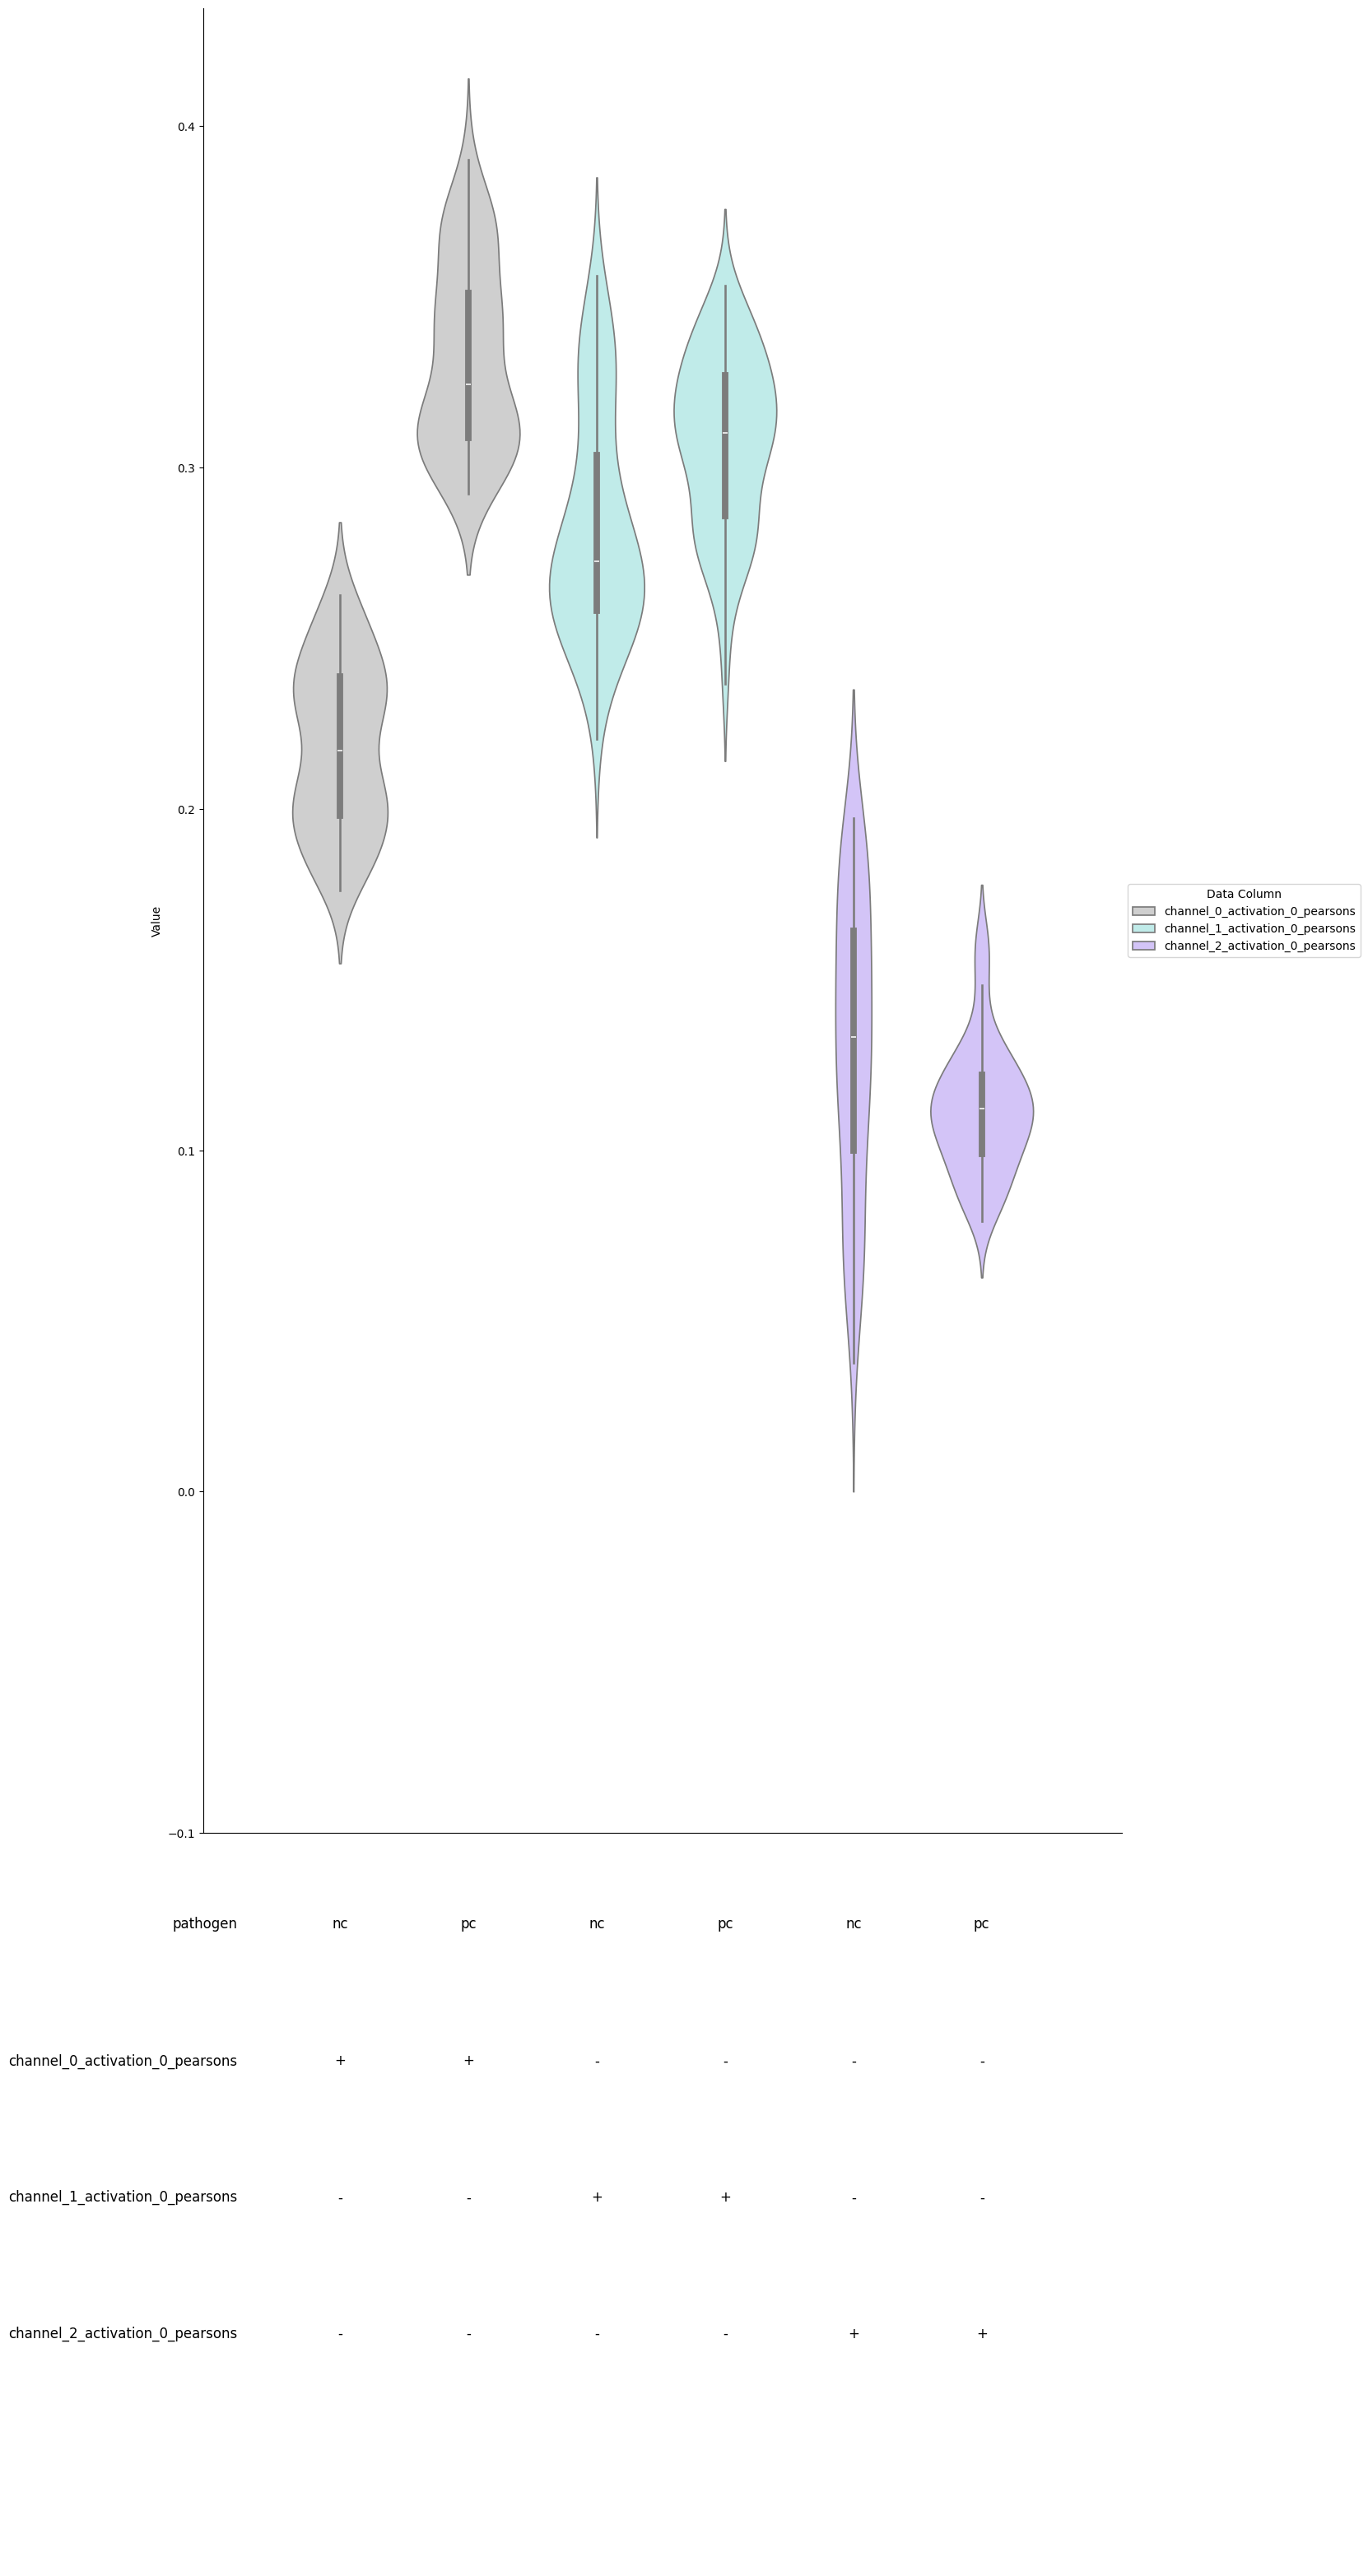

,Comparison,Test Statistic,p-value,Test Name,Column,n,n_object,n_well
0,Normality test for nc on channel_0_activation_...,17.145778,1.891653e-04,D'Agostino-Pearson test,channel_0_activation_0_pearsons,64.0,NaN,NaN
1,Normality test for pc on channel_0_activation_...,15.175632,5.065863e-04,D'Agostino-Pearson test,channel_0_activation_0_pearsons,64.0,NaN,NaN
2,Normality test for nc on channel_1_activation_...,5.445821,6.568330e-02,D'Agostino-Pearson test,channel_1_activation_0_pearsons,64.0,NaN,NaN
3,Normality test for pc on channel_1_activation_...,2.529915,2.822513e-01,D'Agostino-Pearson test,channel_1_activation_0_pearsons,64.0,NaN,NaN
4,Normality test for nc on channel_2_activation_...,7.869767,1.954798e-02,D'Agostino-Pearson test,channel_2_activation_0_pearsons,64.0,NaN,NaN
5,Normality test for pc on channel_2_activation_...,6.093923,4.750306e-02,D'Agostino-Pearson test,channel_2_activation_0_pearsons,64.0,NaN,NaN
6,nc vs pc (channel_0_activation_0_pearsons),0.000000,1.712830e-22,Mann-Whitney U test,channel_0_activation_0_pearsons,NaN,128.0,128.0
7,nc vs pc (channel_1_activation_0_pearsons),1112.000000,8.265062e-06,Mann-Whitney U test,channel_1_activation_0_pearsons,NaN,128.0,128.0
8,nc vs pc (channel_2_activation_0_pearsons),2693.000000,2.130457e-03,Mann-Whitney U test,channel_2_activation_0_pearsons,NaN,128.0,128.0


In [0]:
#Fig
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_db
%matplotlib inline

src = '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1'

srcs = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1',
        '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2',
        '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3',
        '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4']

databases = ['241003_tsg101_screen_plate1.db',
            '241007_tsg101_screen_plate2.db',
            '241008_tsg101_screen_plate3.db',
            '241008_tsg101_screen_plate4.db']

settings = {'src':srcs,
            'database':databases,
            'save':True,
            'graph_name':'fig_2_2',
            'table_names':'saliency_image_correlations',
            'data_column':['channel_0_activation_0_pearsons', 'channel_1_activation_0_pearsons', 'channel_2_activation_0_pearsons'],
            'grouping_column':'pathogen',
            'cell_types':['Hela'],
            'cell_plate_metadata':None,
            'pathogen_types':['nc','pc'],
            'pathogen_plate_metadata':[['c1'],['c2']],
            'treatments':None,
            'treatment_plate_metadata':None,
            'graph_type':'violin',
            'representation':'well',
            'theme':'pastel',
            #'y_lim':[0,0.6],
            'y_lim':[-0.1,None]}

fig,df = plot_data_from_db(settings)
plt.show()
display(df)

In [ ]:
# FIG2E
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

srcs_test = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/training/model/maxvit_t/rgb/epochs_100/maxvit_t_time_241007_test_result.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/datasets/training/model/maxvit_t/rgb/epochs_100/maxvit_t_time_241007_test_result.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/datasets/training/model/maxvit_t/rgb/epochs_100/maxvit_t_time_241008_test_result.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/datasets/training/model/maxvit_t/rgb/epochs_100/maxvit_t_time_241008_test_result.csv']

settings = {'src':srcs_test,
            'graph_name':'fig2x_test cv',
            'data_column':['accuracy'],
            'grouping_column':'common',
            'graph_type':'jitter',
            'theme':'bright',
            'save':False,
            'y_lim':[0.9, 1],
            'log_y':False,
            'log_x':False,
            'representation':'object',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

In [ ]:
# FIG2E
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

srcs_test = ['/nas_mnt/carruthers/Einar/tsg101_screen/xgboost.csv']
settings = {'src':srcs_test,
            'graph_name':'test_acc',
            'data_column':['f1-score'],
            'grouping_column':'model',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':False,
            'y_lim':[None,None],
            'log_y':False,
            'log_x':False,
            'representation':'object',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

In [ ]:
import os
import pandas as pd
from glob import glob

def combine_classification_scores(folders, csv_name, data_column):
    if isinstance(folders, str):
        folder = [folders]
    
    for folder in folders:
        sub_folders = os.listdir(folder)
        for sub_folder in folders:
            path = os.path.join(folder, sub_folder)
            if os.path.isdir(path):
                csv = os.path.join(folder, sub_folder, csv_name)
                print(csv)
                if os.path.exists(csv):
                    ls.extend(csv)
                else:
                    print(f'No such file: {csv}')
                
    combined_df = None
    print(ls)
    for csv_file in ls:
        # Read the CSV into a DataFrame
        df = pd.read_csv(csv_file)

        # Group the data by 'plate_row' and 'plate_column'
        grouped_df = df.groupby(['plate', 'row_name', 'column_name'])[data_column].mean().reset_index()

        # Extract the folder basename and use it to name the new column
        folder_name = os.path.basename(csv_file)
        new_column_name = f"{folder_name}_{data_column}"
        grouped_df = grouped_df.rename(columns={data_column: new_column_name})

        # Merge with the combined DataFrame
        if combined_df is None:
            combined_df = grouped_df
        else:
            combined_df = pd.merge(combined_df, grouped_df, on=['plate', 'row_name', 'column_name'], how='outer')

    return combined_df

folders = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost']
result_df = combine_classification_scores(folders, csv_name='results.csv', data_column="prediction_probability_class_1")
display(result_df)


No such file: /nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/old/results.csv
Found 15 CSV files
channel_0_prediction_probability_class_1
channels_2_3_prediction_probability_class_1
channels_1_2_prediction_probability_class_1
channels_0_2_prediction_probability_class_1
channels_0_1_2_prediction_probability_class_1
channels_1_3_prediction_probability_class_1
channel_1_prediction_probability_class_1
channel_2_prediction_probability_class_1
channel_3_prediction_probability_class_1
channels_0_1_prediction_probability_class_1
channels_1_2_3_prediction_probability_class_1
channels_0_3_prediction_probability_class_1
morphology_prediction_probability_class_1
all_features_prediction_probability_class_1
channels_0_1_2_3_prediction_probability_class_1


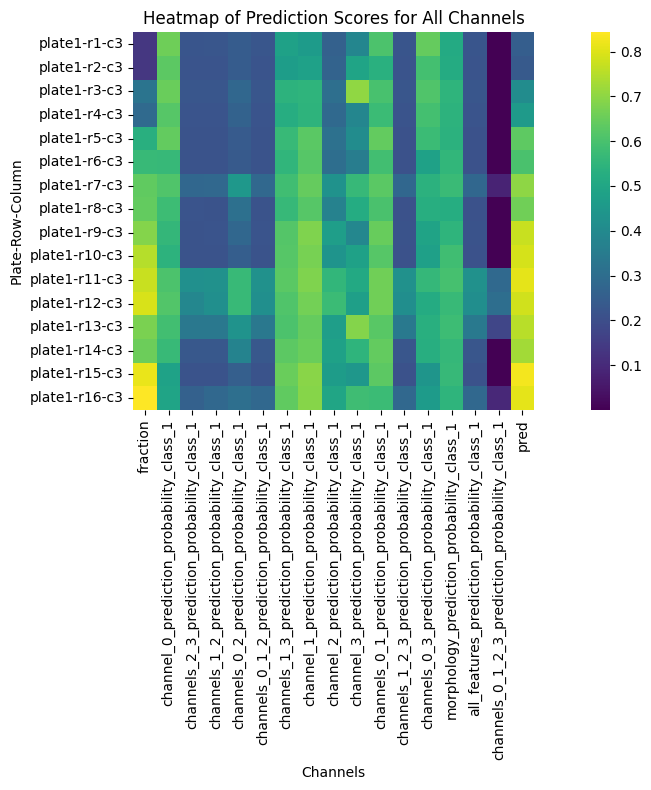

In [15]:
import os
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

def generate_score_heatmap(settings):
    
    def group_cv_score(csv, plate=1, column='c3', data_column='pred'):
        
        df = pd.read_csv(csv)
        if 'row' in df.columns:
            df['row_name'] = df['row']
        if 'col' in df.columns:
            df['column_name'] = df['col']
            df = df[df['col']==column]
        elif 'column' in df.columns:
            df['col'] = df['column']
            df = df[df['col']==column]
        if not plate is None:
            df['plate'] = f"plate{plate}"
        grouped_df = df.groupby(['plate', 'row_name', 'column_name'])[data_column].mean().reset_index()
        grouped_df['prc'] = grouped_df['plate'].astype(str) + '_' + grouped_df['row_name'].astype(str) + '_' + grouped_df['column_name'].astype(str)
        return grouped_df

    def calculate_fraction_mixed_condition(csv, plate=1, column='c3', control_sgrnas = ['TGGT1_220950_1', 'TGGT1_233460_4']):
        df = pd.read_csv(csv)  
        df = df[df['column_name']==column]
        if plate not in df.columns:
            df['plate'] = f"plate{plate}"
        df = df[df['grna_name'].str.match(f'^{control_sgrnas[0]}$|^{control_sgrnas[1]}$')]
        grouped_df = df.groupby(['plate', 'row_name', 'column_name'])['count'].sum().reset_index()
        grouped_df = grouped_df.rename(columns={'count': 'total_count'})
        merged_df = pd.merge(df, grouped_df, on=['plate', 'row_name', 'column_name'])
        merged_df['fraction'] = merged_df['count'] / merged_df['total_count']
        merged_df['prc'] = merged_df['plate'].astype(str) + '_' + merged_df['row_name'].astype(str) + '_' + merged_df['column_name'].astype(str)
        return merged_df

    def plot_multi_channel_heatmap(df, column='c3', cmap='coolwarm'):
        """
        Plot a heatmap with multiple channels as columns.

        Parameters:
        - df: DataFrame with scores for different channels.
        - column: Column to filter by (default is 'c3').
        """
        # Extract row number and convert to integer for sorting
        df['row_num'] = df['row_name'].str.extract(r'(\d+)').astype(int)

        # Filter and sort by plate, row, and column
        df = df[df['column_name'] == column]
        df = df.sort_values(by=['plate', 'row_num', 'column_name'])

        # Drop temporary 'row_num' column after sorting
        df = df.drop('row_num', axis=1)

        # Create a new column combining plate, row, and column for the index
        df['plate_row_col'] = df['plate'] + '-' + df['row_name'] + '-' + df['column_name']

        # Set 'plate_row_col' as the index
        df.set_index('plate_row_col', inplace=True)

        # Extract only numeric data for the heatmap
        heatmap_data = df.select_dtypes(include=[float, int])

        # Plot heatmap with square boxes, no annotations, and 'viridis' colormap
        plt.figure(figsize=(12, 8))
        sns.heatmap(
            heatmap_data,
            cmap=cmap,
            cbar=True,
            square=True,
            annot=False
        )

        plt.title("Heatmap of Prediction Scores for All Channels")
        plt.xlabel("Channels")
        plt.ylabel("Plate-Row-Column")
        plt.tight_layout()

        # Save the figure object and return it
        fig = plt.gcf()
        plt.show()

        return fig


    def combine_classification_scores(folders, csv_name, data_column, plate=1, column='c3'):
        # Ensure `folders` is a list
        if isinstance(folders, str):
            folders = [folders]

        ls = []  # Initialize ls to store found CSV file paths

        # Iterate over the provided folders
        for folder in folders:
            sub_folders = os.listdir(folder)  # Get sub-folder list
            for sub_folder in sub_folders:  # Iterate through sub-folders
                path = os.path.join(folder, sub_folder)  # Join the full path

                if os.path.isdir(path):  # Check if it’s a directory
                    csv = os.path.join(path, csv_name)  # Join path to the CSV file
                    if os.path.exists(csv):  # If CSV exists, add to list
                        ls.append(csv)
                    else:
                        print(f'No such file: {csv}')

        # Initialize combined DataFrame
        combined_df = None
        print(f'Found {len(ls)} CSV files')

        # Loop through all collected CSV files and process them
        for csv_file in ls:
            df = pd.read_csv(csv_file)  # Read CSV into DataFrame
            if 'row' in df.columns:
                if 'row_name' not in df.columns:
                    df['row_name'] = df['row']
            
            df = df[df['column_name']==column]
            if not plate is None:
                df['plate'] = f"plate{plate}"
            # Group the data by 'plate', 'row', and 'col'
            grouped_df = df.groupby(['plate', 'row_name', 'column_name'])[data_column].mean().reset_index()
            # Use the CSV filename to create a new column name
            folder_name = os.path.dirname(csv_file).replace(".csv", "")
            new_column_name = os.path.basename(f"{folder_name}_{data_column}")
            print(new_column_name)
            grouped_df = grouped_df.rename(columns={data_column: new_column_name})

            # Merge into the combined DataFrame
            if combined_df is None:
                combined_df = grouped_df
            else:
                combined_df = pd.merge(combined_df, grouped_df, on=['plate', 'row_name', 'column_name'], how='outer')
        combined_df['prc'] = combined_df['plate'].astype(str) + '_' + combined_df['row_name'].astype(str) + '_' + combined_df['column_name'].astype(str)
        return combined_df
    
    def calculate_mae(df):
        """
        Calculate the MAE between each channel's predictions and the fraction column for all rows.
        """
        # Extract numeric columns excluding 'fraction' and 'prc'
        channels = df.drop(columns=['fraction', 'prc']).select_dtypes(include=[float, int])

        mae_data = []

        # Compute MAE for each channel with 'fraction' for all rows
        for column in channels.columns:
            for index, row in df.iterrows():
                mae = mean_absolute_error([row['fraction']], [row[column]])
                mae_data.append({'Channel': column, 'MAE': mae, 'Row': row['prc']})

        # Convert the list of dictionaries to a DataFrame
        mae_df = pd.DataFrame(mae_data)
        return mae_df

    result_df = combine_classification_scores(settings['folders'], settings['csv_name'], settings['data_column'], settings['plate'], settings['column'], )
    df = calculate_fraction_mixed_condition(settings['csv'], settings['plate'], settings['column'], settings['control_sgrnas'])
    df = df[df['grna_name']==settings['fraction_grna']]
    fraction_df = df[['fraction', 'prc']]
    merged_df = pd.merge(fraction_df, result_df, on=['prc'])
    cv_df = group_cv_score(settings['cv_csv'], settings['plate'], settings['column'], settings['data_column_cv'])
    cv_df = cv_df[[settings['data_column_cv'], 'prc']]
    merged_df = pd.merge(merged_df, cv_df, on=['prc'])
    
    fig = plot_multi_channel_heatmap(merged_df, settings['column'], settings['cmap'])
    if 'row_number' in merged_df.columns:
        merged_df = merged_df.drop('row_num', axis=1)
    mae_df = calculate_mae(merged_df)
    if 'row_number' in mae_df.columns:
        mae_df = mae_df.drop('row_num', axis=1)
        
    if not settings['dst'] is None:
        mae_dst = os.path.join(settings['dst'], f"mae_scores_comparison_plate_{settings['plate']}.csv")
        merged_dst = os.path.join(settings['dst'], f"scores_comparison_plate_{settings['plate']}_data.csv")
        heatmap_save = os.path.join(settings['dst'], f"scores_comparison_plate_{settings['plate']}.pdf")
        mae_df.to_csv(mae_dst, index=False)
        merged_df.to_csv(merged_dst, index=False)
        fig.savefig(heatmap_save, format='pdf', dpi=600, bbox_inches='tight')
    return merged_df

folders = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old']
csv = '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/unique_combinations.csv'

settings = {'folders':folders,
            'csv_name':'results.csv',
            'data_column':'prediction_probability_class_1',
            'csv':csv,
            'plate':1,
            'column':'c3',
            'cmap':'viridis',
            'control_sgrnas':['TGGT1_239740_1', 'TGGT1_233460_4'],
            'fraction_grna':'TGGT1_239740_1',
            'cv_csv':'/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/241007_241003_tsg101_screen_plate1_maxvit_t_epoch_99_acc_99.0_channels_rgb_result.csv',
            'data_column_cv':'pred',
            'dst':'/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results'}

df = generate_score_heatmap(settings)


In [16]:
display(df)

,fraction,prc,plate,row_name,column_name,channel_0_prediction_probability_class_1,channels_2_3_prediction_probability_class_1,channels_1_2_prediction_probability_class_1,channels_0_2_prediction_probability_class_1,channels_0_1_2_prediction_probability_class_1,...,channel_2_prediction_probability_class_1,channel_3_prediction_probability_class_1,channels_0_1_prediction_probability_class_1,channels_1_2_3_prediction_probability_class_1,channels_0_3_prediction_probability_class_1,morphology_prediction_probability_class_1,all_features_prediction_probability_class_1,channels_0_1_2_3_prediction_probability_class_1,pred,row_num
0,0.133053,plate1_r1_c3,plate1,r1,c3,0.656148,0.223103,0.224895,0.242107,0.224895,...,0.257749,0.385719,0.605522,0.222418,0.642568,0.510983,0.222418,0.000439,0.247293,1
1,0.750507,plate1_r10_c3,plate1,r10,c3,0.541896,0.215841,0.215817,0.247486,0.215817,...,0.435426,0.483751,0.619709,0.213960,0.474222,0.584468,0.213960,0.000175,0.787838,10
2,0.772772,plate1_r11_c3,plate1,r11,c3,0.604706,0.418327,0.424772,0.567377,0.424772,...,0.555832,0.508639,0.661557,0.423109,0.561411,0.593696,0.423109,0.284041,0.809855,11
3,0.793200,plate1_r12_c3,plate1,r12,c3,0.613981,0.391233,0.415809,0.567302,0.415809,...,0.575568,0.473702,0.660542,0.413587,0.516498,0.569209,0.413587,0.302955,0.783062,12
4,0.673619,plate1_r13_c3,plate1,r13,c3,0.587380,0.336683,0.338469,0.431810,0.338469,...,0.469099,0.687918,0.624244,0.341998,0.532969,0.577497,0.341998,0.176155,0.751151,13
5,0.652280,plate1_r14_c3,plate1,r14,c3,0.569407,0.229829,0.228238,0.376839,0.228238,...,0.481642,0.547169,0.640910,0.226104,0.527927,0.562486,0.226104,0.001724,0.725924,14
6,0.813605,plate1_r15_c3,plate1,r15,c3,0.486175,0.216740,0.215817,0.251032,0.215817,...,0.462573,0.446430,0.629532,0.213960,0.438766,0.566073,0.213960,0.000261,0.828590,15
7,0.842931,plate1_r16_c3,plate1,r16,c3,0.492018,0.257746,0.282247,0.303611,0.282247,...,0.495014,0.581345,0.574184,0.280427,0.460801,0.547506,0.280427,0.093335,0.808585,16
8,0.134935,plate1_r2_c3,plate1,r2,c3,0.631208,0.219104,0.219052,0.240926,0.219052,...,0.266072,0.492141,0.533608,0.217658,0.592434,0.515002,0.217658,0.000251,0.236292,2
9,0.323513,plate1_r3_c3,plate1,r3,c3,0.649931,0.224834,0.226837,0.279714,0.226837,...,0.303014,0.702698,0.598329,0.224311,0.612208,0.547104,0.224311,0.000723,0.406049,3


In [ ]:
folders = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost']
csv = '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO2_paired/unique_combinations.csv'

settings = {'folders':folders,
            'csv_name':'results.csv',
            'data_column':'prediction_probability_class_1',
            'csv':csv,
            'plate':2,
            'column':'c3',
            'control_sgrnas':['TGGT1_239740_1', 'TGGT1_233460_4'],
            'fraction_grna':'TGGT1_239740_1',
            'cv_csv':'/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/datasets/241007_241007_tsg101_screen_plate2_maxvit_t_epoch_100_channels_rgb_result.csv',
            'data_column_cv':'pred',
            'dst':'/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results'}

df = generate_score_heatmap(settings)

In [ ]:
folders = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost']
csv = '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO3_paired/unique_combinations.csv'

settings = {'folders':folders,
            'csv_name':'results.csv',
            'data_column':'prediction_probability_class_1',
            'csv':csv,
            'plate':3,
            'column':'c3',
            'control_sgrnas':['TGGT1_239740_1', 'TGGT1_233460_4'],
            'fraction_grna':'TGGT1_239740_1',
            'cv_csv':'/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/datasets/241008_241008_tsg101_screen_plate3_maxvit_t_epoch_100_channels_rgb_result.csv',
            'data_column_cv':'pred',
            'dst':'/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results'}

df = generate_score_heatmap(settings)

In [ ]:
folders = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost']
csv = '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO4_paired/unique_combinations.csv'

settings = {'folders':folders,
            'csv_name':'results.csv',
            'data_column':'prediction_probability_class_1',
            'csv':csv,
            'plate':4,
            'column':'c3',
            'control_sgrnas':['TGGT1_239740_1', 'TGGT1_233460_4'],
            'fraction_grna':'TGGT1_239740_1',
            'cv_csv':'/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/datasets/241008_241008_tsg101_screen_plate4_maxvit_t_epoch_100_channels_rgb_result.csv',
            'data_column_cv':'pred',
            'dst':'/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results'}

df = generate_score_heatmap(settings)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

def calculate_mae(df):
    """
    Calculate the MAE between each channel's predictions and the fraction column for all rows.
    """
    # Extract numeric columns excluding 'fraction' and 'prc'
    channels = df.drop(columns=['fraction', 'prc']).select_dtypes(include=[float, int])
    
    mae_data = []

    # Compute MAE for each channel with 'fraction' for all rows
    for column in channels.columns:
        for index, row in df.iterrows():
            mae = mean_absolute_error([row['fraction']], [row[column]])
            mae_data.append({'Channel': column, 'MAE': mae, 'Row': row['prc']})

    # Convert the list of dictionaries to a DataFrame
    mae_df = pd.DataFrame(mae_data)
    return mae_df

def plot_jitterplot(mae_df):
    """
    Plot a jitter plot showing the MAE values for each channel.
    """
    plt.figure(figsize=(12, 6))
    sns.stripplot(data=mae_df, x='Channel', y='MAE', jitter=True, palette='viridis')
    plt.xticks(rotation=90)
    plt.title("Jitter Plot of MAE for Each Channel Compared to Fraction")
    plt.ylabel("Mean Absolute Error (MAE)")
    plt.xlabel("Channels")
    plt.tight_layout()
    plt.show()

# Example usage

#
mae_df = calculate_mae(df)
display(mae_df)
plot_jitterplot(mae_df)


In [ ]:
import pandas as pd


df = pd.read_csv('/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost/channel_1/results.csv')

# Replace this with your actual true labels (for demonstration)
df = df[df['data_usage']=='test']
df = df[['data_usage','prcfo','prc','column_name', 'predictions']]
df['label'] = df['column_name'].apply(lambda x: 1 if x == 'c2' else 0)
display(df)
df['predictions'] = df['predictions'].astype(int)
df['label'] = df['label'].astype(int)

# Calculate accuracy
# Calculate accuracy
accuracy = (df['predictions'] == df['label']).mean()
print(f'Accuracy: {accuracy}')

def calculate_accuracy_from_results(results, data_usage='test', pc='c1', save=False):
    
    if not isinstance(results, list):
        results = [results]
        
    accuracies = []
    for result in results:
        dft = pd.read_csv(result)
        df = df[df['data_usage']==data_usage]
        df = df[['data_usage','prcfo','prc','column_name', 'predictions']]
        df['label'] = df['column_name'].apply(lambda x: 1 if x == pc else 0)
        display(df)
        df['predictions'] = df['predictions'].astype(int)
        df['label'] = df['label'].astype(int)
        accuracy = (df['predictions'] == df['label']).mean()
        _dict = {'result':accuracy}
        print(_dict)
        accuracies.append(_dict)
    ac_df = 
    
    if save:
        dst = os.path.dirname(results[0])
        save_path = os.path.join(dst, 'accuracy.csv')


In [ ]:
import os
import pandas as pd
def calculate_accuracy_from_results(folder, data_usage='test', pc='c2', save=False):
    """
    Calculate accuracy from prediction results CSV files and optionally save the results.
    
    Parameters:
    - results: List of paths to results CSV files (or a single path).
    - data_usage: Filter rows by 'data_usage' column (default: 'test').
    - pc: The positive class (default: 'c1').
    - save: If True, save the accuracy DataFrame to a CSV file (default: False).
    
    Returns:
    - A DataFrame containing the accuracies for each result.
    """
    ls=[]
    # Iterate over the provided folders
    sub_folders = os.listdir(folder)  # Get sub-folder list
    for sub_folder in sub_folders:  # Iterate through sub-folders
        path = os.path.join(folder, sub_folder)  # Join the full path
        if os.path.isdir(path):  # Check if it’s a directory
            csv = os.path.join(path, 'results.csv')  # Join path to the CSV file
            if os.path.exists(csv):  # If CSV exists, add to list
                ls.append(csv)
            else:
                print(f'No such file: {csv}')
    
    results = ls
    if not isinstance(results, list):
        results = [results]
        
    accuracies = []  # Store accuracy results

    for result in results:
        # Read the result CSV
        df = pd.read_csv(result)

        # Filter rows by the specified data usage
        df = df[df['data_usage'] == data_usage]

        # Select relevant columns and create binary labels
        df = df[['data_usage', 'prcfo', 'prc', 'column_name', 'predictions']]
        df['label'] = df['column_name'].apply(lambda x: 1 if x == pc else 0)

        # Ensure predictions and labels are integers
        df['predictions'] = df['predictions'].astype(int)
        df['label'] = df['label'].astype(int)

        # Calculate accuracy
        accuracy = (df['predictions'] == df['label']).mean()
        
        #display(df)

        # Store accuracy result in a dictionary
        _dict = {'result': os.path.basename(os.path.dirname(result)), 'accuracy': accuracy}
        print(_dict)  # Display the result
        accuracies.append(_dict)  # Add to the list

    # Create a DataFrame from the accuracy results
    ac_df = pd.DataFrame(accuracies)

    # Save the DataFrame to a CSV file if requested
    if save:
        dst = os.path.dirname(results[0])
        save_path = os.path.join(dst, 'accuracy.csv')
        ac_df.to_csv(save_path, index=False)
        print(f"Accuracy results saved to: {save_path}")

    return ac_df


folder='/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost/'
#folder = '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost'
#folder = '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost'
#folder ='/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost'

calculate_accuracy_from_results(folder, data_usage='train', pc='c2', save=True)

,Channel,MAE,Row,plate,common
0,channel_0_prediction_probability_class_1,0.398606,plate1_r1_c3,plate1,spacr
1,channel_0_prediction_probability_class_1,0.342812,plate1_r10_c3,plate1,spacr
2,channel_0_prediction_probability_class_1,0.251808,plate1_r11_c3,plate1,spacr
3,channel_0_prediction_probability_class_1,0.221750,plate1_r12_c3,plate1,spacr
4,channel_0_prediction_probability_class_1,0.147707,plate1_r13_c3,plate1,spacr
...,...,...,...,...,...
251,pred,0.030180,plate4_r5_c3,plate4,spacr
252,pred,0.005439,plate4_r6_c3,plate4,spacr
253,pred,0.014742,plate4_r7_c3,plate4,spacr
254,pred,0.023445,plate4_r8_c3,plate4,spacr


Plot saved to /nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/results/test/test_MAE_Channel_jitter_bar.pdf
Test results saved to /nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/results/test/test_MAE_Channel_jitter_bar.csv


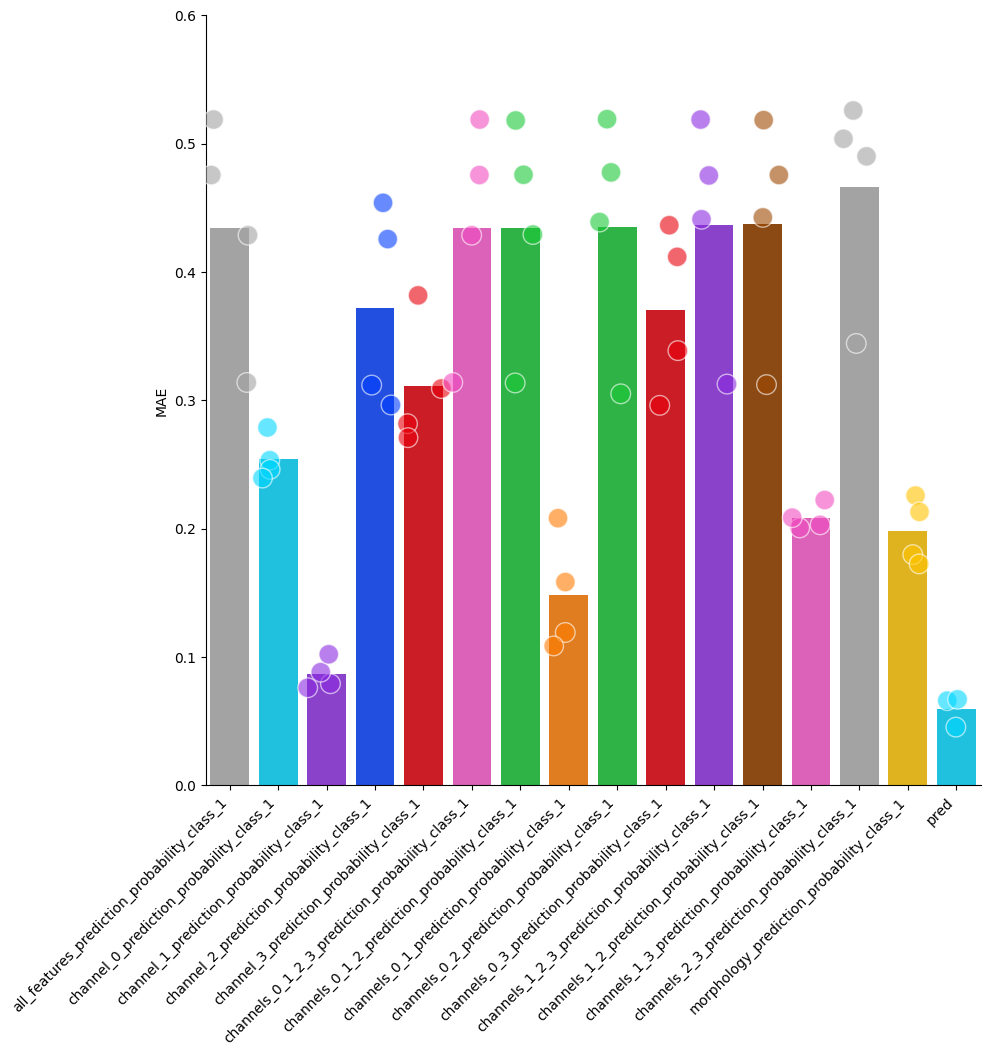

,Comparison,Test Statistic,p-value,Test Name,Column,n,n_object,n_well
0,Normality test for all_features_prediction_pro...,0.945066,6.854465e-01,Shapiro-Wilk test,MAE,4.0,NaN,NaN
1,Normality test for channel_0_prediction_probab...,0.898531,4.238008e-01,Shapiro-Wilk test,MAE,4.0,NaN,NaN
2,Normality test for channel_1_prediction_probab...,0.920939,5.422259e-01,Shapiro-Wilk test,MAE,4.0,NaN,NaN
3,Normality test for channel_2_prediction_probab...,0.854978,2.426923e-01,Shapiro-Wilk test,MAE,4.0,NaN,NaN
4,Normality test for channel_3_prediction_probab...,0.872698,3.083872e-01,Shapiro-Wilk test,MAE,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...
132,channels_1_3_prediction_probability_class_1 vs...,NaN,1.000000e+00,Tukey HSD Post-hoc,NaN,NaN,128.0,8.0
133,channels_1_3_prediction_probability_class_1 vs...,NaN,2.511440e-01,Tukey HSD Post-hoc,NaN,NaN,112.0,7.0
134,channels_2_3_prediction_probability_class_1 vs...,NaN,9.841057e-05,Tukey HSD Post-hoc,NaN,NaN,128.0,8.0
135,channels_2_3_prediction_probability_class_1 vs...,NaN,3.918011e-08,Tukey HSD Post-hoc,NaN,NaN,112.0,7.0


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

mae_csvs = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/mae_scores_comparison_plate_1.csv',
           '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/mae_scores_comparison_plate_2.csv',
           '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/mae_scores_comparison_plate_3.csv',
           '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/mae_scores_comparison_plate_4.csv']

settings = {'src':mae_csvs,
            'graph_name':'test',
            'data_column':['MAE'],
            'grouping_column':'Channel',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':True,
            'y_lim':[0,0.6],
            'log_y':False,
            'log_x':False,
            'representation':'plate',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

srcs_test = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost/channel_0/accuracy.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost/channel_0/accuracy.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost/channel_0/accuracy.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost/channel_0/accuracy.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/training/model/maxvit_t/rgb/epochs_100/maxvit_t_time_241007_test_result.csv']

settings = {'src':srcs_test,
            'graph_name':'xg_acc',
            'data_column':['accuracy'],
            'grouping_column':'result',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':True,
            'y_lim':[0.9,1.01],
            'log_y':False,
            'log_x':False,
            'representation':'object',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

In [ ]:
def combine_classification_scores(folders, csv_name, data_column, plate=1, column='c3'):
    # Ensure `folders` is a list
    if isinstance(folders, str):
        folders = [folders]

    ls = []  # Initialize ls to store found CSV file paths
    
    # Initialize combined DataFrame
    combined_df = None
    print(f'Found {len(ls)} CSV files')

    # Loop through all collected CSV files and process them
    for csv_file in ls:
        df = pd.read_csv(csv_file)  # Read CSV into DataFrame
        df = df[df['column_name']==column]
        if not plate is None:
            df['plate'] = f"plate{plate}"
        # Group the data by 'plate', 'row', and 'col'
        grouped_df = df.groupby(['plate', 'row_name', 'column_name'])[data_column].mean().reset_index()
        # Use the CSV filename to create a new column name
        folder_name = os.path.dirname(csv_file).replace(".csv", "")
        new_column_name = os.path.basename(f"{folder_name}_{data_column}")
        print(new_column_name)
        grouped_df = grouped_df.rename(columns={data_column: new_column_name})

        # Merge into the combined DataFrame
        if combined_df is None:
            combined_df = grouped_df
        else:
            combined_df = pd.merge(combined_df, grouped_df, on=['plate', 'row_name', 'column_name'], how='outer')
    combined_df['prc'] = combined_df['plate'].astype(str) + '_' + combined_df['row'].astype(str) + '_' + combined_df['col'].astype(str)
    return combined_df